In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
from analysis_support import *

# Uniform Sequence, CP-SAT, Single-edge ${\cal V}_k$ cuts

In [3]:
file_pattern = 'uniform.cp_sat.single_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1500 result files
Missing results: 0


In [4]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_116,42,0,0,32,265,2,4.498645,0.012986,0.114906,1,True,10.505666,10.505666,10.528094,10.528094,5
1,BARN,instance_223,1,0,1,42,401,3,3.637051,0.018108,0.196387,2,True,10.959880,10.959880,11.189634,11.189634,7
2,BARN,instance_030,42,1,1,62,856,5,6.669253,0.090947,0.364913,4,True,10.659717,10.269509,10.929320,10.282293,9
3,BARN,instance_097,1337,0,0,32,341,2,3.814125,0.016147,0.063053,1,True,9.972783,9.972783,10.069642,10.069642,6
4,BARN,instance_034,567,0,0,42,471,3,5.447484,0.022503,0.041137,2,True,10.823097,10.823097,10.942042,10.942042,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,BARN,instance_161,1337,0,0,32,351,2,3.814125,0.013659,0.118057,1,True,9.845679,9.845679,9.866041,9.866041,5
1496,BARN,instance_291,1337,0,0,32,330,2,4.455439,0.017106,0.064827,1,True,9.972783,9.972783,10.069642,10.069642,6
1497,BARN,instance_060,1,0,0,32,311,2,3.231782,0.012735,0.085622,1,True,10.337132,10.337132,10.305313,10.305313,6
1498,BARN,instance_297,1337,0,0,52,533,4,6.427273,0.028361,0.296845,3,True,13.201426,13.201426,13.572893,13.572893,7


## Analysis

### Halton Sequence Sampling

In [5]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
1,BARN,instance_223,1,0,1,42,401,3,3.637051,0.018108,0.196387,2,True,10.959880,10.959880,11.189634,11.189634,7
2,BARN,instance_030,42,1,1,62,856,5,6.669253,0.090947,0.364913,4,True,10.659717,10.269509,10.929320,10.282293,9
4,BARN,instance_034,567,0,0,42,471,3,5.447484,0.022503,0.041137,2,True,10.823097,10.823097,10.942042,10.942042,6
5,BARN,instance_187,567,1,1,82,1081,7,7.976453,0.160365,0.356199,6,True,10.954240,10.188121,11.014534,10.133496,8
6,BARN,instance_043,1,2,0,52,629,4,3.637051,0.054703,0.292576,3,True,9.653536,9.657270,9.546881,9.570140,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,BARN,instance_117,567,1,0,62,737,5,4.422349,0.062196,0.477315,4,True,12.600338,10.746326,12.889690,10.830671,7
1491,BARN,instance_042,1,1,0,42,518,3,3.614825,0.036860,0.088361,2,True,9.653536,9.821634,9.546881,9.748515,4
1492,BARN,instance_258,8193,1,0,42,449,3,5.270272,0.028734,0.267844,2,True,9.826367,9.817300,9.809811,9.781011,6
1493,BARN,instance_008,42,0,2,52,764,4,4.029598,0.073007,0.125771,3,True,10.329661,10.329661,10.311303,10.311303,6


In [6]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_116,42,0,0,32,265,2,4.498645,0.012986,0.114906,1,True,10.505666,10.505666,10.528094,10.528094,5
3,BARN,instance_097,1337,0,0,32,341,2,3.814125,0.016147,0.063053,1,True,9.972783,9.972783,10.069642,10.069642,6
7,BARN,instance_088,1337,0,0,32,334,2,9.172641,0.012556,0.077407,1,True,9.845679,9.845679,9.866041,9.866041,5
12,BARN,instance_104,1,0,0,32,312,2,7.294249,0.017223,0.181407,1,True,9.821634,9.821634,9.748515,9.748515,4
13,BARN,instance_269,42,0,0,32,214,2,7.939100,0.007868,0.307341,1,True,10.472686,10.472686,10.458010,10.458010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,BARN,instance_093,1,0,0,32,400,2,3.734945,0.014908,0.043856,1,True,10.161025,10.161025,10.122126,10.122126,5
1495,BARN,instance_161,1337,0,0,32,351,2,3.814125,0.013659,0.118057,1,True,9.845679,9.845679,9.866041,9.866041,5
1496,BARN,instance_291,1337,0,0,32,330,2,4.455439,0.017106,0.064827,1,True,9.972783,9.972783,10.069642,10.069642,6
1497,BARN,instance_060,1,0,0,32,311,2,3.231782,0.012735,0.085622,1,True,10.337132,10.337132,10.305313,10.305313,6


In [7]:
multiple_iterations['iterations'].describe()

count    971.000000
mean       3.790937
std        2.160699
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       19.000000
Name: iterations, dtype: float64

In [8]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
1333,instance_181,42,19
716,instance_099,42,17
277,instance_180,1337,17
628,instance_185,42,15
326,instance_137,42,15
1305,instance_207,1337,15
843,instance_111,567,14
1133,instance_096,1337,14
755,instance_285,1337,13
1356,instance_069,1,12


In [9]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
1,instance_223,1,3,3,42,401,3.637051
2,instance_030,42,5,5,62,856,6.669253
4,instance_034,567,3,3,42,471,5.447484
5,instance_187,567,7,7,82,1081,7.976453
6,instance_043,1,4,4,52,629,3.637051
...,...,...,...,...,...,...,...
1490,instance_117,567,5,5,62,737,4.422349
1491,instance_042,1,3,3,42,518,3.614825
1492,instance_258,8193,3,3,42,449,5.270272
1493,instance_008,42,4,4,52,764,4.029598


In [10]:
multiple_expansions['rgg_V'].describe()

count    971.000000
mean      59.909372
std       21.606987
min       42.000000
25%       42.000000
50%       52.000000
75%       62.000000
max      212.000000
Name: rgg_V, dtype: float64

In [11]:
multiple_expansions['rgg_E'].describe()

count     971.000000
mean      806.113285
std       568.846733
min       269.000000
25%       485.000000
50%       644.000000
75%       906.000000
max      6922.000000
Name: rgg_E, dtype: float64

In [12]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
6,instance_043,1,2
9,instance_150,42,4
23,instance_111,1,4
27,instance_189,42,3
30,instance_190,8193,2
...,...,...,...
1457,instance_013,567,2
1458,instance_286,8193,2
1463,instance_036,8193,2
1474,instance_292,567,2


In [13]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
19,instance_093,567,3
21,instance_189,1,4
22,instance_115,1337,2
23,instance_111,1,8
28,instance_031,42,2
...,...,...,...
1456,instance_189,1337,2
1462,instance_246,42,2
1479,instance_241,1,2
1489,instance_244,42,8


In [14]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_116,42,0.012986,0.114906
1,instance_223,1,0.018108,0.196387
2,instance_030,42,0.090947,0.364913
3,instance_097,1337,0.016147,0.063053
4,instance_034,567,0.022503,0.041137
...,...,...,...,...
1495,instance_161,1337,0.013659,0.118057
1496,instance_291,1337,0.017106,0.064827
1497,instance_060,1,0.012735,0.085622
1498,instance_297,1337,0.028361,0.296845


In [15]:
time_data['plan_time'].describe()

count    1500.000000
mean        0.069243
std         0.152664
min         0.005754
25%         0.014111
50%         0.030691
75%         0.064338
max         2.875326
Name: plan_time, dtype: float64

In [16]:
time_data['verif_time'].describe()

count    1500.000000
mean        0.235772
std         0.159714
min         0.022526
25%         0.128442
50%         0.194110
75%         0.293252
max         1.210775
Name: verif_time, dtype: float64

In [17]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

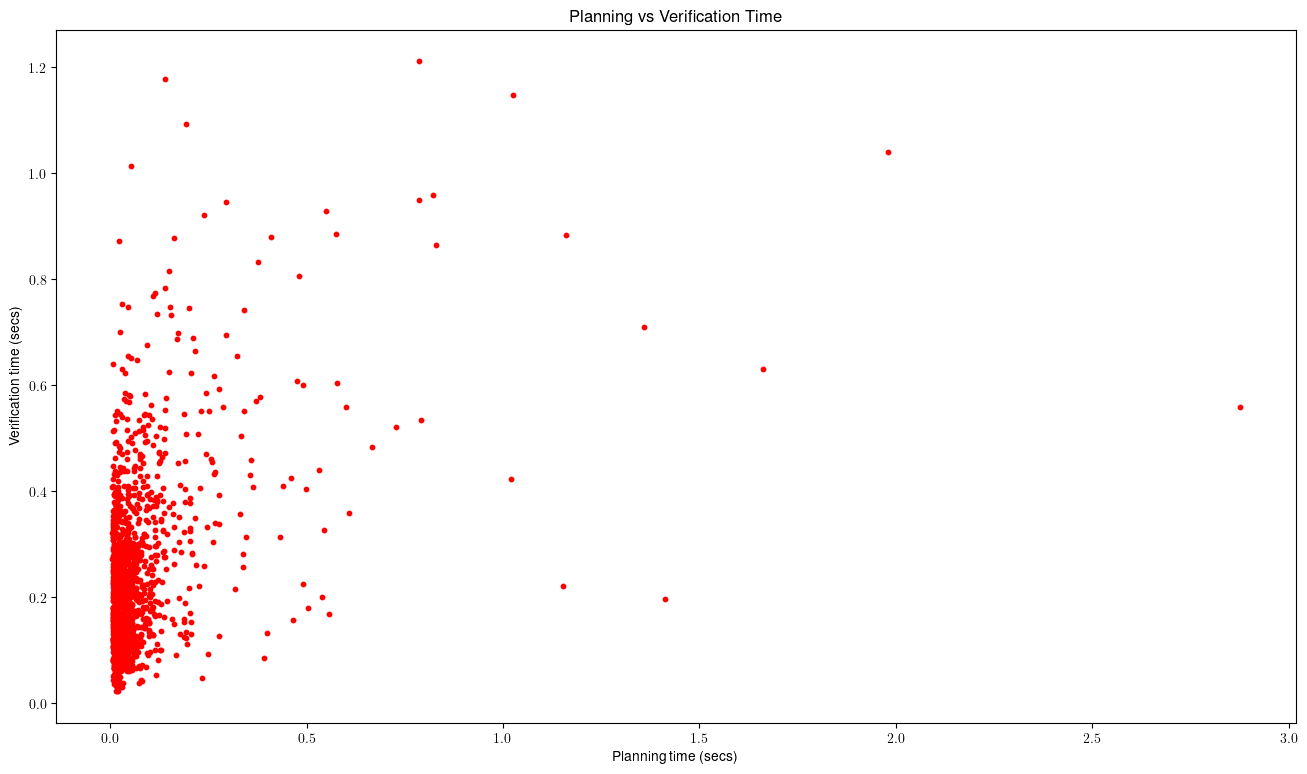

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [19]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

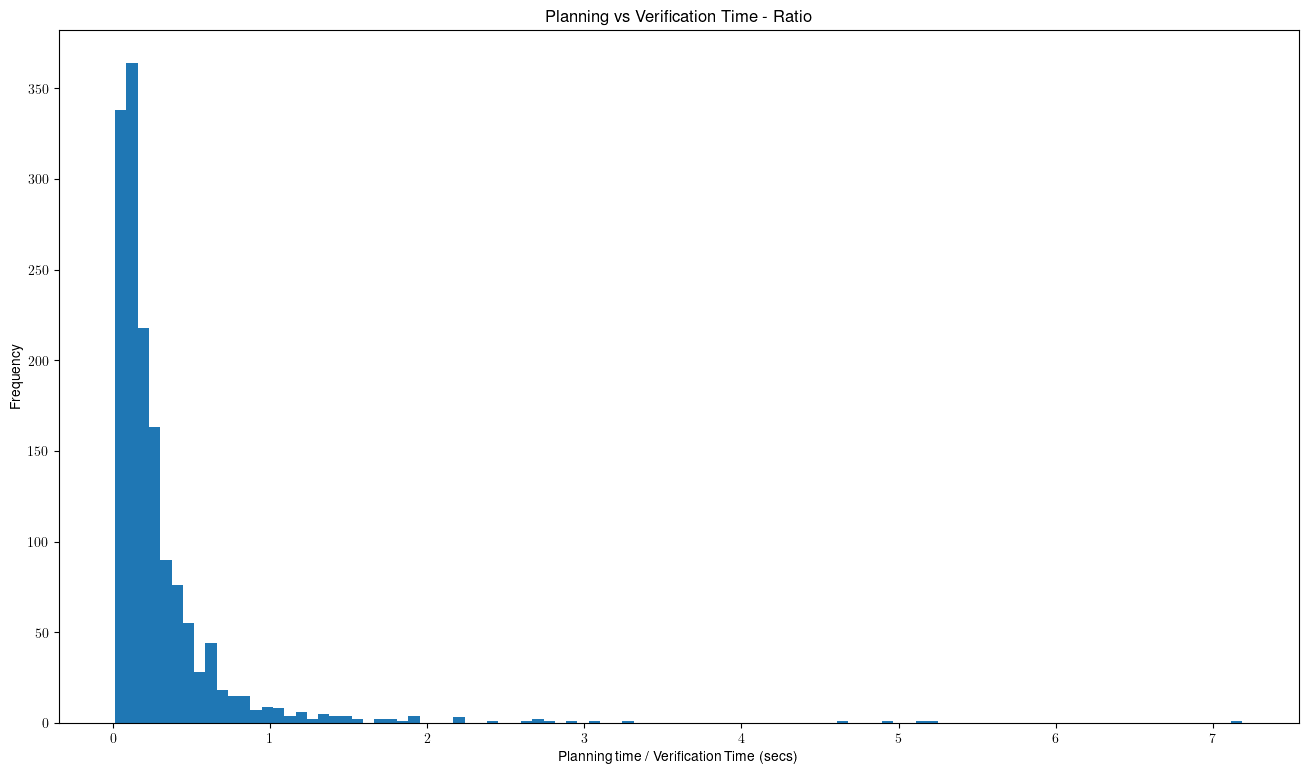

In [20]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [21]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

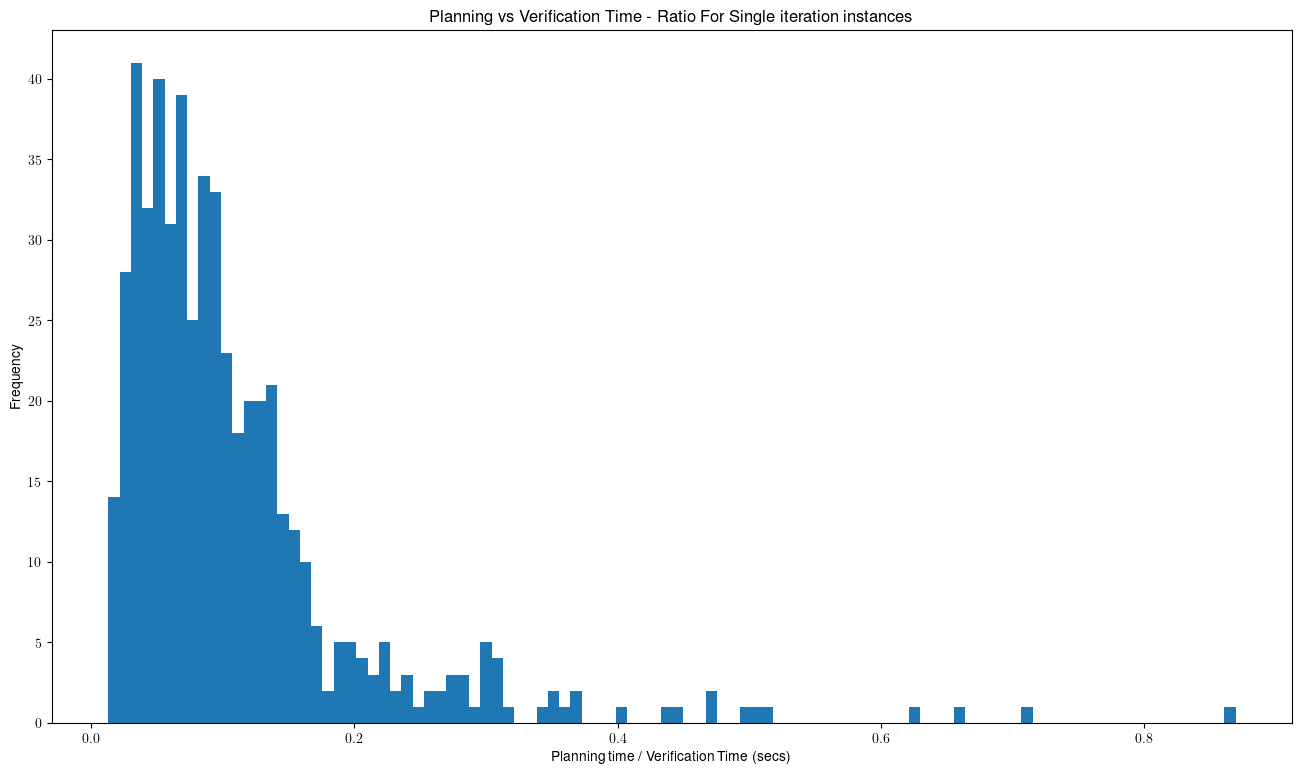

In [22]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

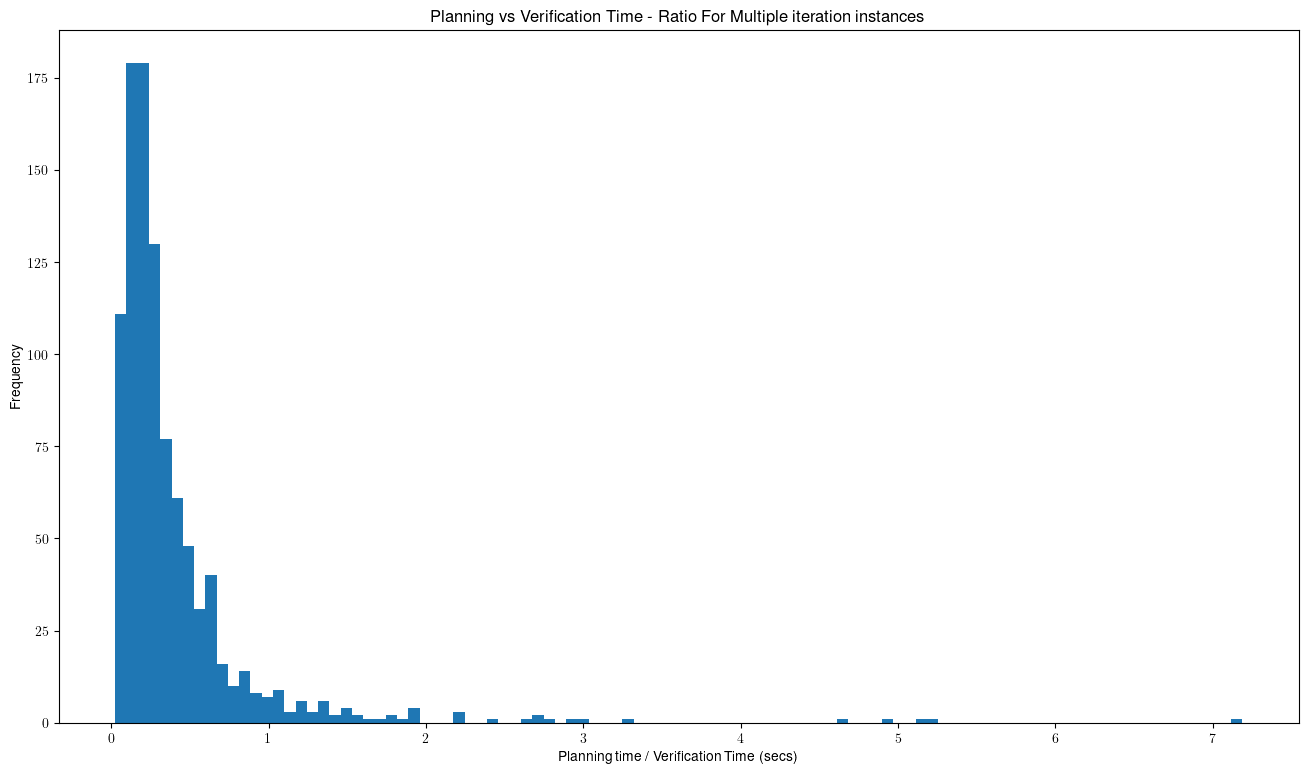

In [23]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [24]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

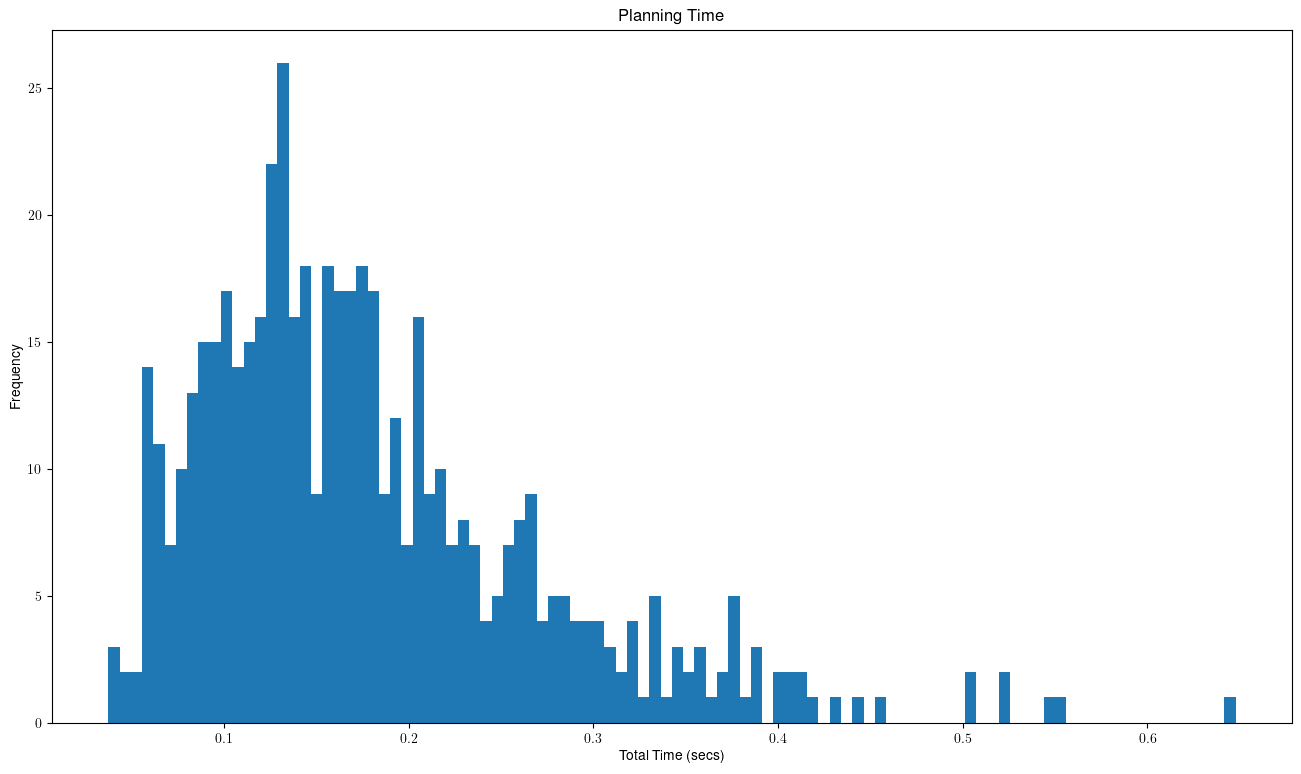

In [25]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

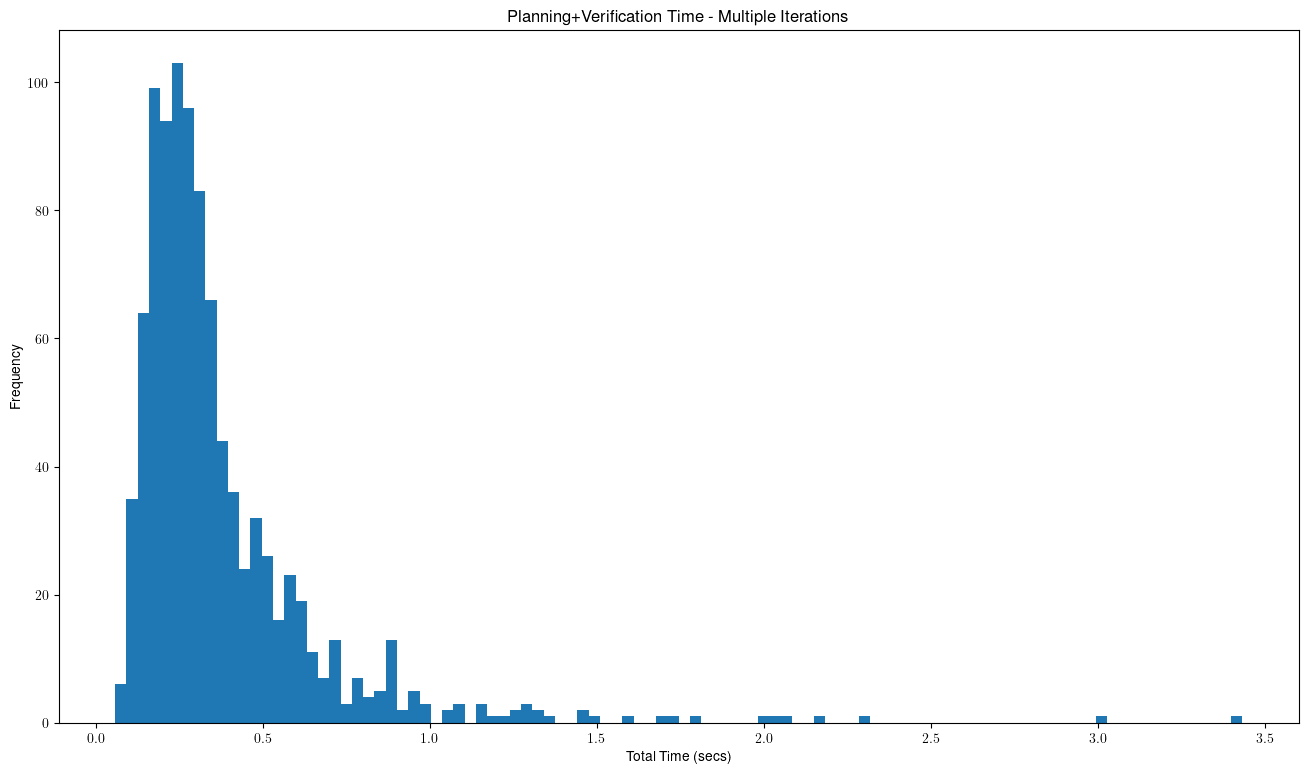

In [27]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [28]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,10.505666
1,10.959880
2,10.269509
3,9.972783
4,10.823097
...,...
1495,9.845679
1496,9.972783
1497,10.337132
1498,13.201426


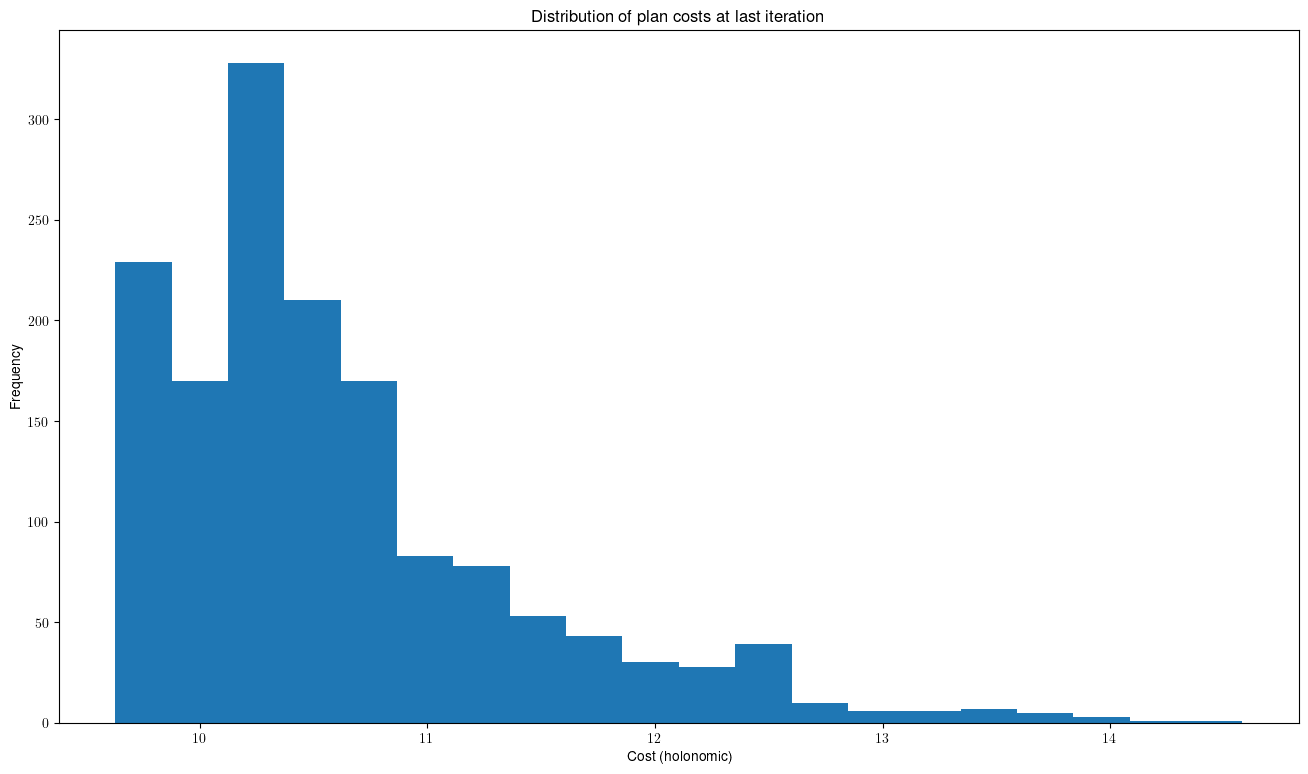

In [29]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [30]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

1       0.000000
2      -0.390208
4       0.000000
5      -0.766119
6       0.003734
          ...   
1490   -1.854012
1491    0.168097
1492   -0.009067
1493    0.000000
1498    0.000000
Length: 971, dtype: float64

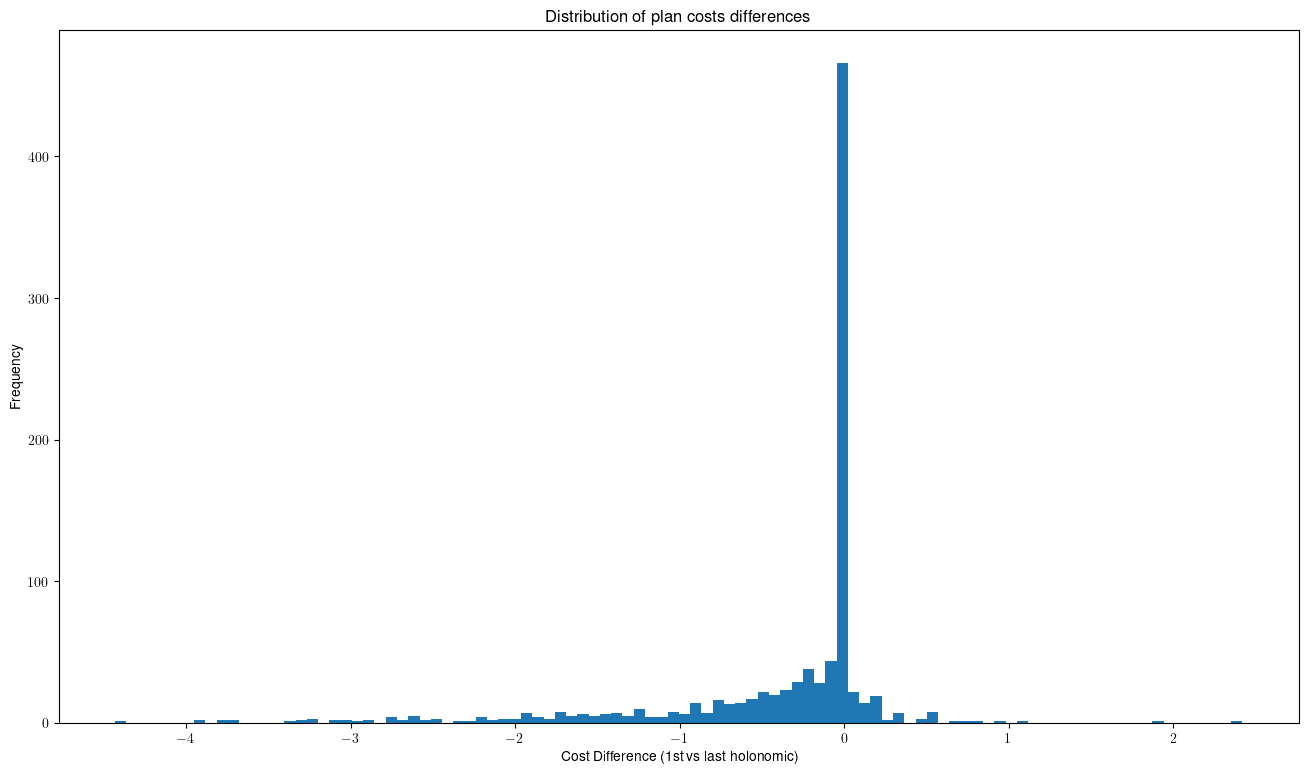

In [31]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [32]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0       0.000000
1       0.000000
2      -0.647027
3       0.000000
4       0.000000
          ...   
1495    0.000000
1496    0.000000
1497    0.000000
1498    0.000000
1499    0.000000
Length: 1500, dtype: float64

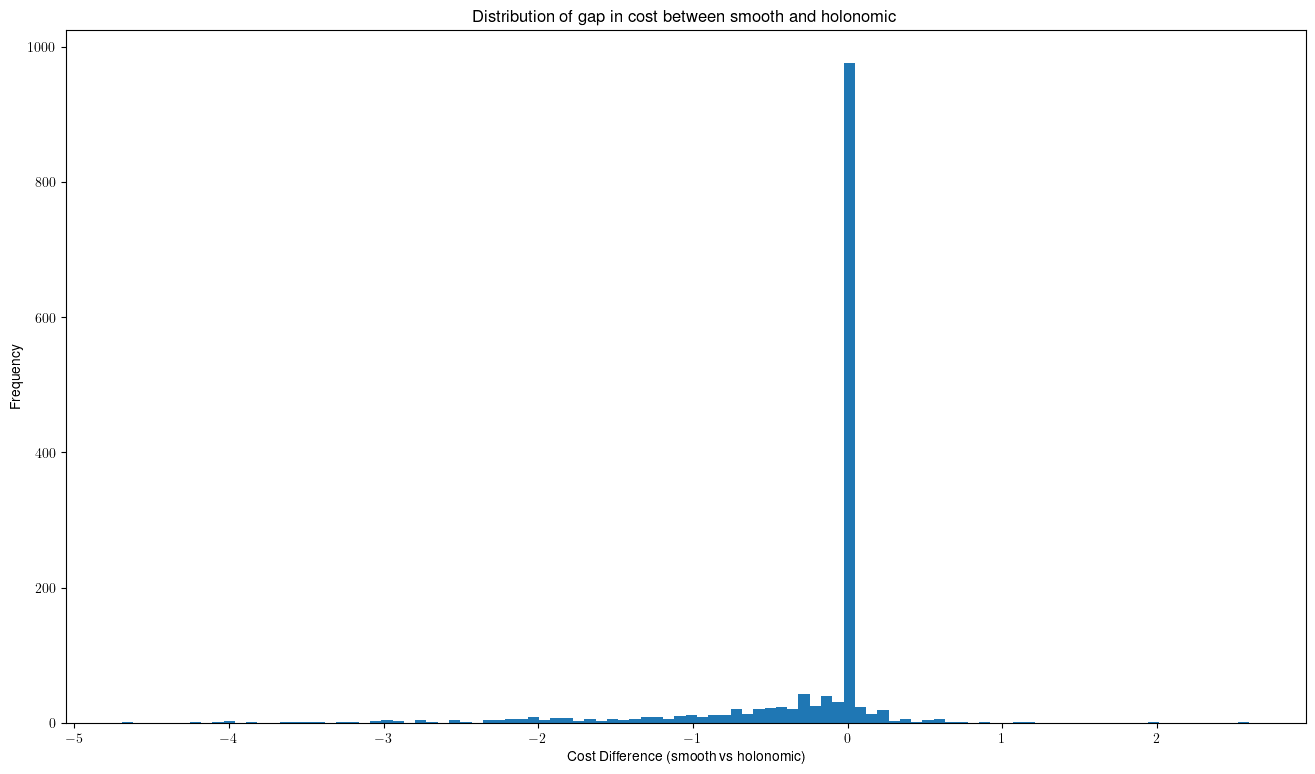

In [33]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [34]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_116,42,0.012986,0.114906,5
1,instance_223,1,0.018108,0.196387,7
2,instance_030,42,0.090947,0.364913,9
3,instance_097,1337,0.016147,0.063053,6
4,instance_034,567,0.022503,0.041137,6
...,...,...,...,...,...
1495,instance_161,1337,0.013659,0.118057,5
1496,instance_291,1337,0.017106,0.064827,6
1497,instance_060,1,0.012735,0.085622,6
1498,instance_297,1337,0.028361,0.296845,7


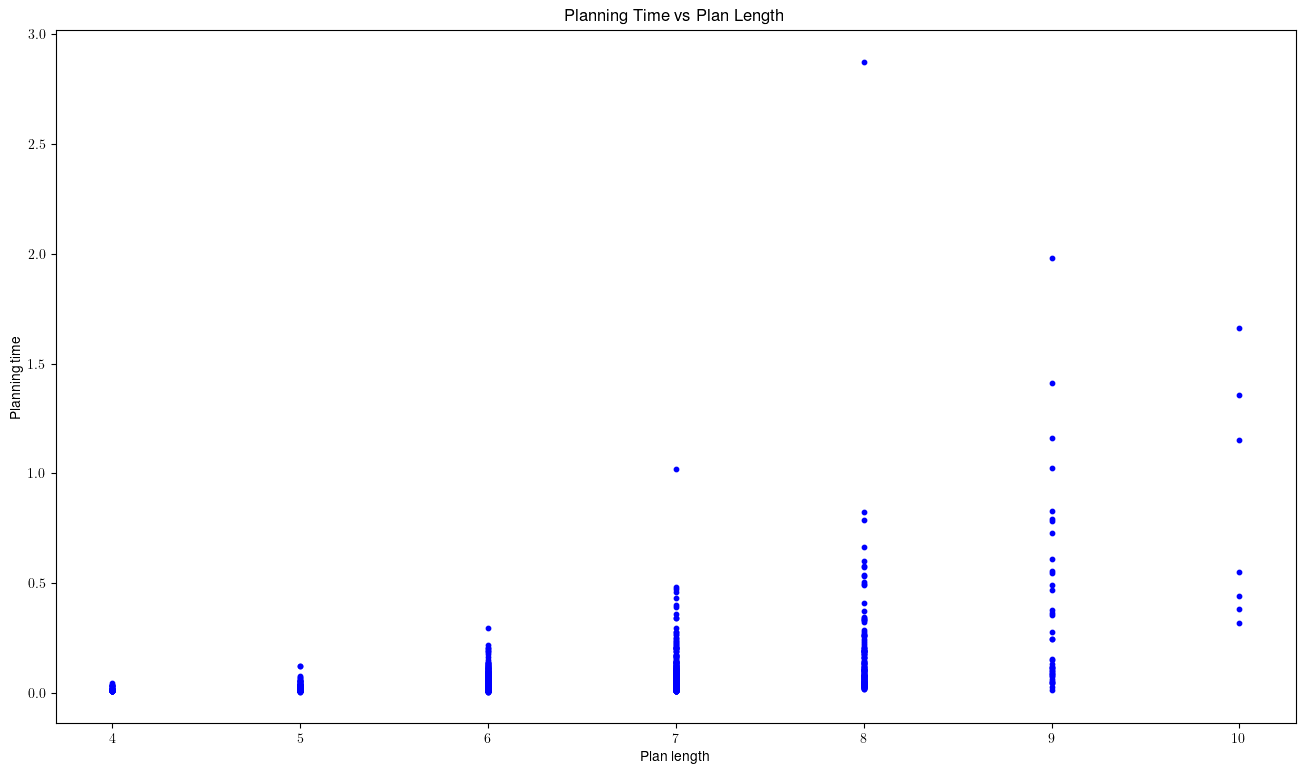

In [35]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [36]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_116,42,0.012986,0.114906,0,0
1,instance_223,1,0.018108,0.196387,0,1
2,instance_030,42,0.090947,0.364913,1,1
3,instance_097,1337,0.016147,0.063053,0,0
4,instance_034,567,0.022503,0.041137,0,0
...,...,...,...,...,...,...
1495,instance_161,1337,0.013659,0.118057,0,0
1496,instance_291,1337,0.017106,0.064827,0,0
1497,instance_060,1,0.012735,0.085622,0,0
1498,instance_297,1337,0.028361,0.296845,0,0


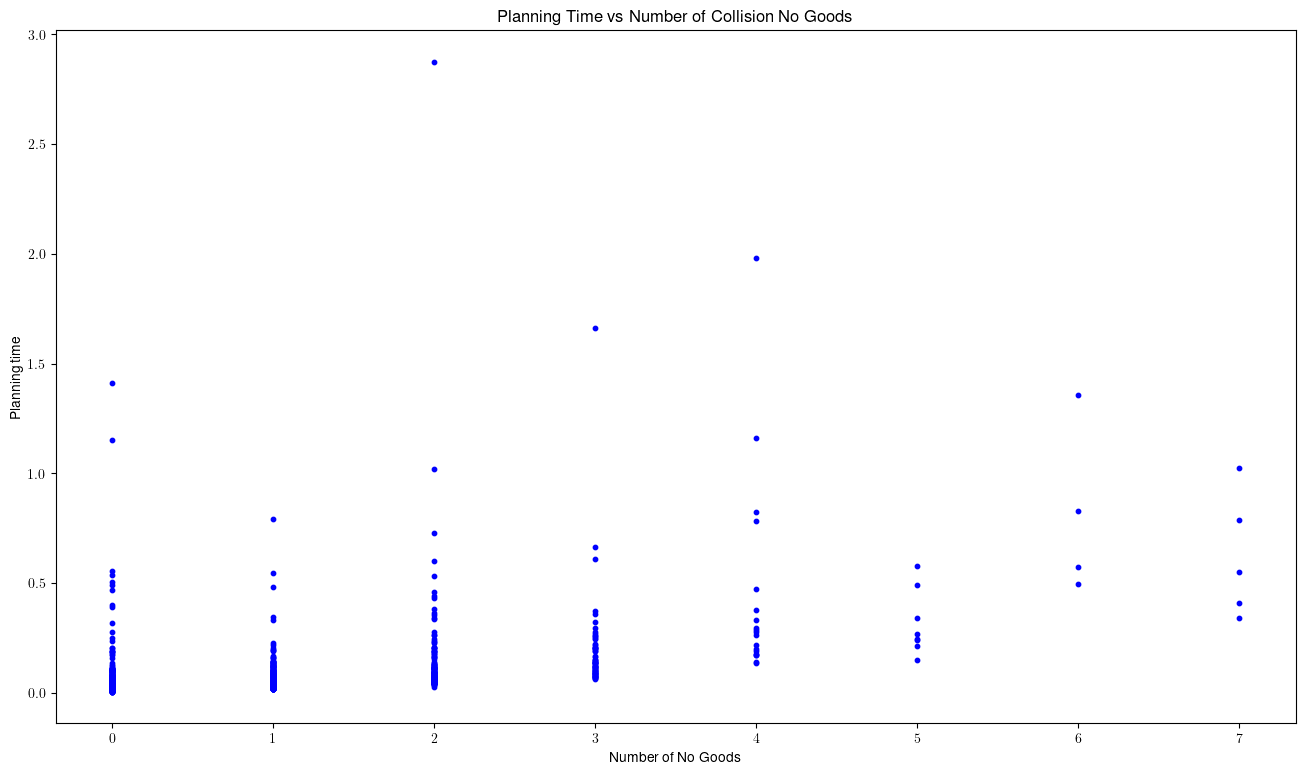

In [37]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

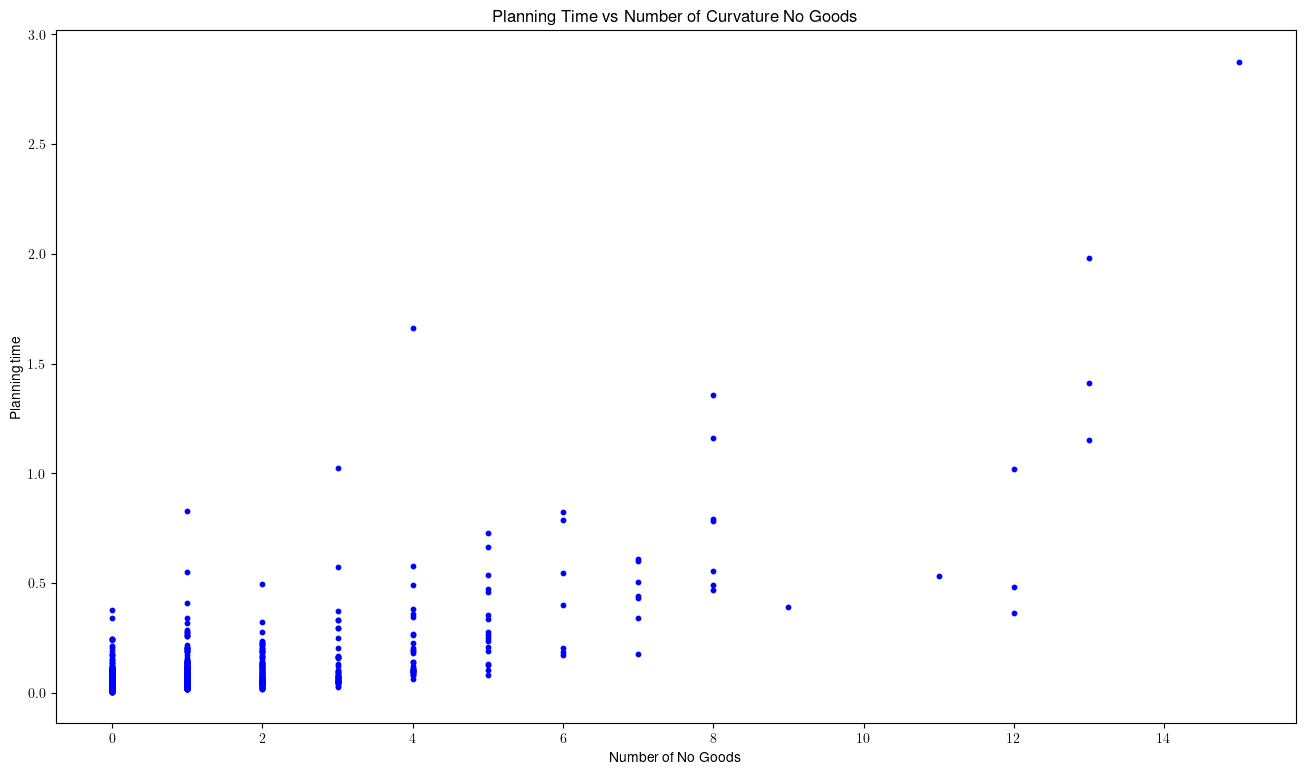

In [38]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [39]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [40]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[0, 148, 1006, 1274, 1474, 1491, 1500, 1500, 1500, 1500, 1500]


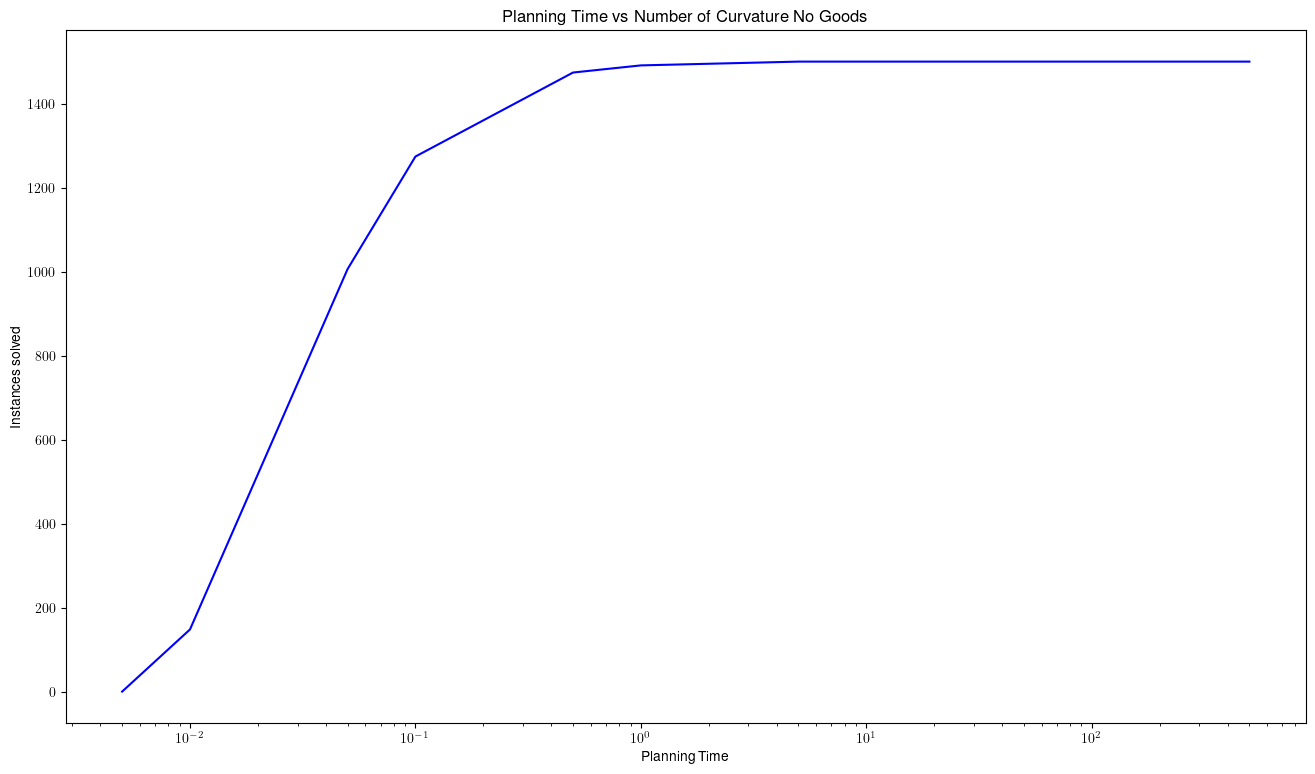

In [41]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [42]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [43]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [44]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_13288/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [45]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_116,42,1,0,0,0.012986,0.114906,0.127892
1,instance_223,1,2,0,1,0.018108,0.196387,0.214495
2,instance_030,42,4,1,1,0.090947,0.364913,0.455859
3,instance_097,1337,1,0,0,0.016147,0.063053,0.079200
4,instance_034,567,2,0,0,0.022503,0.041137,0.063640
...,...,...,...,...,...,...,...,...
1495,instance_161,1337,1,0,0,0.013659,0.118057,0.131716
1496,instance_291,1337,1,0,0,0.017106,0.064827,0.081933
1497,instance_060,1,1,0,0,0.012735,0.085622,0.098357
1498,instance_297,1337,3,0,0,0.028361,0.296845,0.325206


In [46]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [47]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_116,42,1,0,0,0.012986,0.114906,0.127892,2.779711,7.960710,4.967742,5.556051,1.065729
instance_223,1,2,0,1,0.018108,0.196387,0.214495,1.670087,3.547327,4.322581,1.579696,1.150973
instance_030,42,4,1,1,0.090947,0.364913,0.455859,2.523335,6.374391,4.277778,4.744755,1.401955
instance_097,1337,1,0,0,0.016147,0.063053,0.079200,4.710882,9.958929,2.258065,9.419029,1.122558
instance_034,567,2,0,0,0.022503,0.041137,0.063640,3.521692,9.006600,2.875000,8.112660,1.171066
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_161,1337,1,0,0,0.013659,0.118057,0.131716,3.268505,9.457158,3.696970,6.235288,1.140626
instance_291,1337,1,0,0,0.017106,0.064827,0.081933,3.175427,8.360404,3.243243,8.291592,1.328666
instance_060,1,1,0,0,0.012735,0.085622,0.098357,2.505326,7.477404,5.161290,3.822499,1.122558


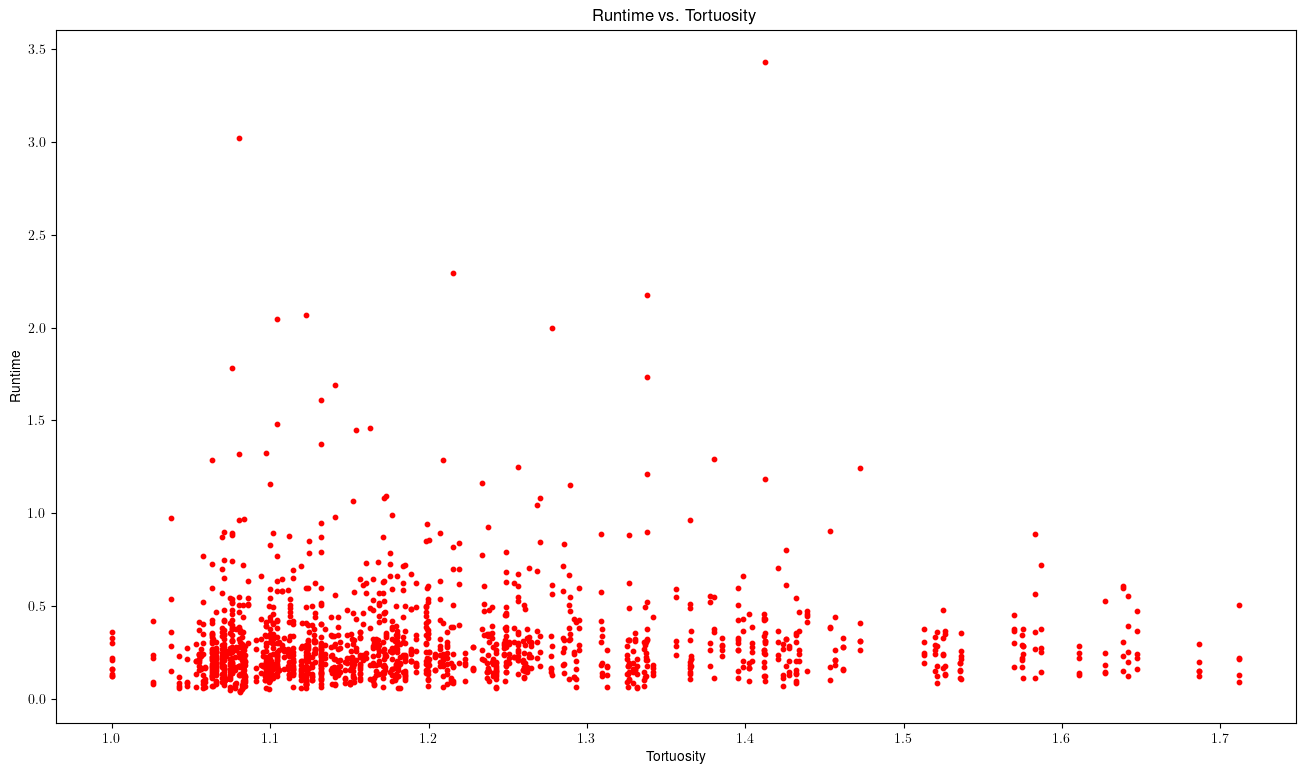

In [48]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

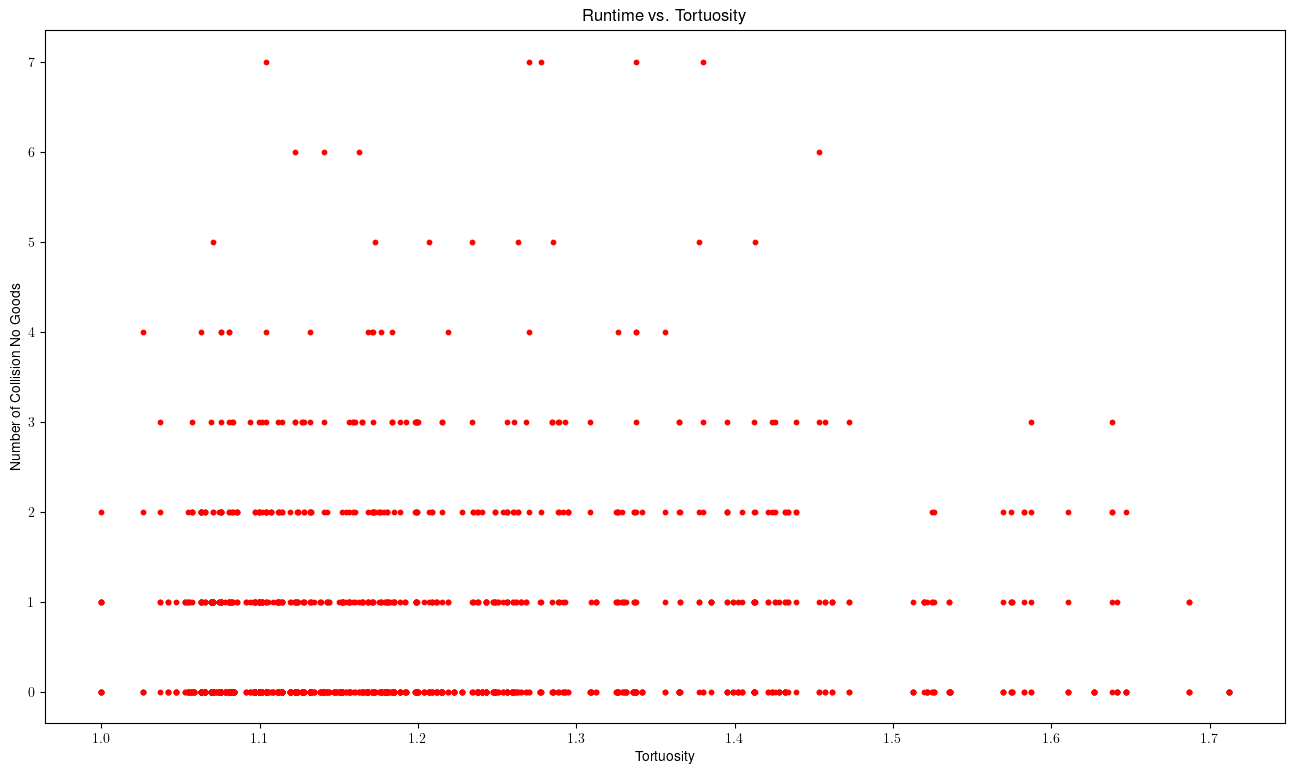

In [49]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

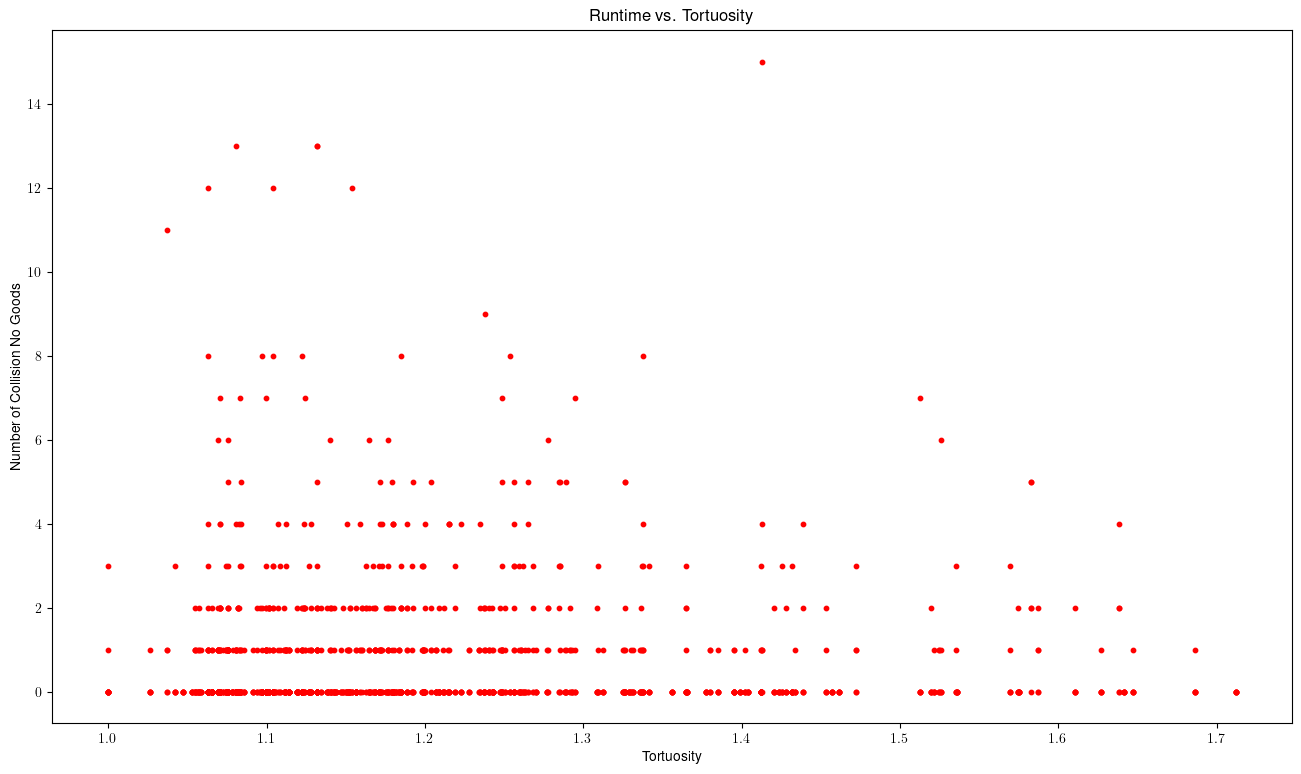

In [50]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()